In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture
%matplotlib inline

In [2]:
def q(x, y):
    g1 = mlab.bivariate_normal(x, y, 1.0, 1.0, -1, -1, -0.8)
    g2 = mlab.bivariate_normal(x, y, 1.5, 0.8, 1, 2, 0.6)
    return 0.6*g1+8.4*g2/(0.6+8.4)

In [3]:
def sample(n):
    '''Metropolis Hastings'''
    N = n+1000
    s = 0
    r = np.zeros(2)
    p = q(r[0], r[1])
    print p
    samples = []
    for i in xrange(N):
        rn = r + np.random.normal(size=2)
        pn = q(rn[0], rn[1])
        if pn >= p:
            p = pn
            r = rn
        else:
            u = np.random.rand()
            if u < pn/p:
                p = pn
                r = rn
#         if i % s == 0:
        samples.append(r)

    samples = np.array(samples)
    gmix = mixture.GMM(n_components=2, covariance_type='full')
    
    gmix.fit(samples)
    labels = gmix.predict(samples)
    training_labels = labels[:n]
    test_labels = labels[n:]
    training_data = samples[:n]
    test_data = samples[n:]
    
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, s=1)

    '''Plot target'''
    dx = 0.01
    x = np.arange(np.min(samples), np.max(samples), dx)
    y = np.arange(np.min(samples), np.max(samples), dx)
    X, Y = np.meshgrid(x, y)
    Z = q(X, Y)
    CS = plt.contour(X, Y, Z, 10, alpha=0.5)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.savefig("samples.png")
    return training_data, training_labels, test_data, test_labels

In [4]:
def plot_q():
    fig = plt.figure(figsize=(15,10))
    ax = fig.gca(projection="3d")
    X = np.arange(-5, 5, 0.1)
    Y = np.arange(-5, 5, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = q(X, Y)
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('coolwarm'),
            linewidth=0, antialiased=True)
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
    plt.clf()

In [ ]:
training_data, training_labels, test_data, test_labels = sample(10000)


In [20]:
sizes = np.logspace(2,4.5,20)
print sizes

[   100.            135.387618      183.29807108    248.16289228
    335.98182863    454.8777947     615.84821107    833.78222347
   1128.83789168   1528.30673266   2069.13808111   2801.3567612
   3792.69019073   5134.83290744   6951.92796178   9412.04967268
  12742.74985703  17252.10549942  23357.2146909   31622.77660168]


In [21]:
from sklearn.svm import SVC
import time

In [22]:
training_time = []
test_time = []
accuracies = []

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

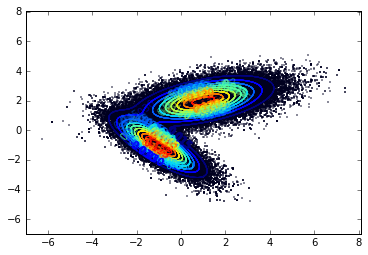

In [23]:
for size in sizes:
    i = int(size)
    clf = SVC()
    training_data, training_labels, test_data, test_labels = sample(i)
    tic = time.time()
    clf.fit(training_data, training_labels)
    toc = time.time()
    training_time.append(toc - tic)
    tic = time.time()
    predict_values = clf.predict(test_data)
    toc = time.time()
    test_time.append(toc - tic)
    accuracy = clf.score(test_data, test_labels)
    
    accuracies.append(accuracy)


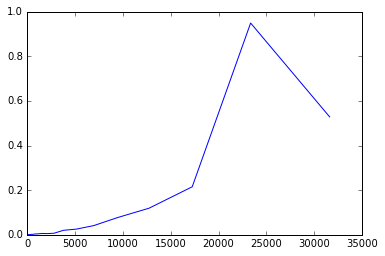

In [24]:
plt.plot(sizes, training_time)

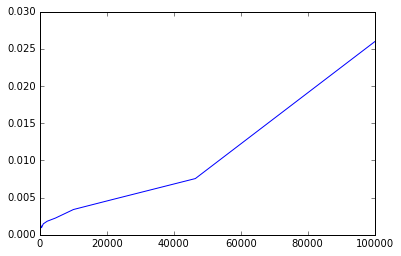

In [16]:
plt.plot(sizes, test_time)

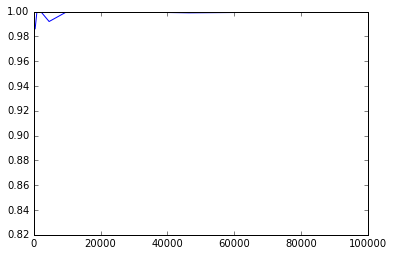

In [19]:
plt.plot(sizes,accuracies)